In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os
import re
import scipy as sci
import time

In [2]:
# global vars
samp_rt = 5120 #sampling rate Hz
time_import = 3000 # time to analyse seconds
data_import = samp_rt * time_import # lines of data to import

In [3]:
def list_o_list(big_list, lil_size):
    l_o_l = []
    for i in range(0, len(big_list), lil_size):
        lil = big_list[i : min(i + lil_size, len(big_list))]
        l_o_l.append(lil)
    return(l_o_l)

In [4]:
# def freq_analysis(sample , ttime, responsefrq =1, sampfrq = 5120):
#     mmtic = time.perf_counter()
#     frqs = ""
#     amps = []
#     samp_int = 1/sampfrq
#     ft = np.fft.fft(sample)/len(sample)
# #     mmhic = time.perf_counter()
#     ft = ft[range(int(len(sample)/2))]
#     tpCount = len(sample)
#     values = np.arange(int(tpCount/2))
#     timePeriod = tpCount/sampfrq
#     frequencies = values/timePeriod
#     ft = abs(ft)
# #     mmcup = time.perf_counter()
#     #print(len(ft))
#     #print(len(frequencies))
#     feq = pd.DataFrame(data = {"freq":frequencies})
# #     l1 = time.perf_counter()
#     feq["amp"] = ft
# #     l2 = time.perf_counter()
#     frqs = np.arange(0, 1 + int(feq.freq.max()), responsefrq)
# #     l3 = time.perf_counter()
#     #print(len(frqs))
#     mmbless = time.perf_counter()
#     for n in frqs:
#         cu = feq.loc[(feq.freq > n ) & (feq.freq <= n + responsefrq),"amp"].mean()
        
#         amps.append(cu)
# #     l4 = time.perf_counter()
# #     mmtoc = time.perf_counter()
# #     print("init:", mmhic-mmtic)
# #     print("fft:", mmcup - mmhic, "total:", mmcup - mmtic)
# #     print("df1:", mmbless - mmcup, "total:", mmbless - mmtic)
# #     print("done:", mmtoc - mmbless, "total:", mmtoc - mmtic)
# #     print("l1, l2, l3, l4:", l1-mmcup, l2-mmcup, l3-mmcup, l4-mmcup)
# #     print("for:", l4 - l3)
#     return(frqs, amps, feq)

In [5]:
def freq_analysis(sample , ttime, responsefrq =1, sampfrq = 5120):
#     mmtic = time.perf_counter()
    frqs = ""
    amps = []
    samp_int = 1/sampfrq
    ft = np.fft.fft(sample)/len(sample)
#     mmhic = time.perf_counter()
    ft = ft[range(int(len(sample)/2))]
    tpCount = len(sample)
    values = np.arange(int(tpCount/2))
    timePeriod = tpCount/sampfrq
    frequencies = values/timePeriod
    ft = abs(ft)
#     mmcup = time.perf_counter()
    #print(len(ft))
    #print(len(frequencies))
    feq = pd.DataFrame(data = {"freq":frequencies})
#     l1 = time.perf_counter()
    feq["amp"] = ft
#     l2 = time.perf_counter()
    frqs = np.arange(0, 1 + int(feq.freq.max()), responsefrq)
#     l3 = time.perf_counter()
    #print(len(frqs))
#     mmbless = time.perf_counter()
    wow = feq.amp.rolling(responsefrq).mean()
    yep = np.arange(responsefrq - 1, len(wow) + responsefrq  -1, responsefrq)
    amps = wow[yep]
#     l4 = time.perf_counter()
#     mmtoc = time.perf_counter()
#     print("init:", mmhic-mmtic)
#     print("fft:", mmcup - mmhic, "total:", mmcup - mmtic)
#     print("df1:", mmbless - mmcup, "total:", mmbless - mmtic)
#     print("done:", mmtoc - mmbless, "total:", mmtoc - mmtic)
#     print("l1, l2, l3, l4:", l1-mmcup, l2-mmcup, l3-mmcup, l4-mmcup)
#     print("for:", l4 - l3)
    return(frqs, amps)

In [6]:
test_list  = list(range(1,33,4))
test_chop = 9
print(list_o_list(test_list, test_chop))


[[1, 5, 9, 13, 17, 21, 25, 29]]


In [7]:
os.listdir()

['.git',
 '.gitignore',
 '.idea',
 '.ipynb_checkpoints',
 'alt_modular.py',
 'bayesian_optimiser_tute.py',
 'capstone2_milestone 2.ipynb',
 'checkpoint.pth',
 'data',
 'data_prep.ipynb',
 'data_prep_development.ipynb',
 'data_prep_final.ipynb',
 'EDA.ipynb',
 'EDA2.ipynb',
 'eda2_b.ipynb',
 'EDA3.ipynb',
 'Figure 2020-11-08 143412.png',
 'Figure 2020-11-08 143421.png',
 'gps_inclusion.ipynb',
 'init_lstm_epoch_10.dat',
 'init_lstm_optim_state_epoch_10.dat',
 'init_lstm_state_epoch_10.dat',
 'linear_LSTM.py',
 'lstm.ipynb',
 'lstm2.py',
 'lstm2_data_prep.py',
 'lstm2_data_prep_double_sensor.py',
 'LSTM_classes.py',
 'LSTM_classes_functions.py',
 'lstm_examples.py',
 'lstm_model_01.py',
 'LSTM_modular.py',
 'LSTM_modular_combined.py',
 'LSTM_modular_two_sensor.py',
 'lstm_multivariate_working.py',
 'lstm_network.py',
 'LSTM_pipeline.py',
 'LSTM_sentiment_test.py',
 'lstm_training.ipynb',
 'main.py',
 'README.md',
 'requirements.txt',
 'testing_Conv1D.ipynb',
 'torch_loader_tute.py',
 'Un

In [8]:
home = os.getcwd()


In [14]:

os.chdir("./data/08-14-18-V118")
os.getcwd()

'C:\\Users\\Grey Ghost\\Documents\\GitHub\\project-sturm_drang\\data\\08-14-18-V118'

In [15]:
files = os.listdir()
csv_files = []
for n in files:
    if re.search(".csv", n):
        csv_files.append(n)

In [16]:
print(files)

['.hubstorinfo', '08-14-18-V118_ch1.csv', '08-14-18-V118_ch2.csv', 'ft_first_3000.csv']


In [17]:
df = pd.read_csv(csv_files[0], header=15, names=["time", "acceleration_a"], nrows = data_import)
df.head()
df2 = pd.read_csv(csv_files[1], header=15, names=["time", "acceleration_b"], nrows = data_import)
df2.head()
raw = pd.merge(left=df, right=df2, how = "outer")
del df
del df2

In [22]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15360000 entries, 0 to 15359999
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 468.8 MB


In [23]:
acc_a = list(raw.acceleration_a)
acc_b = list(raw.acceleration_b)


In [24]:
l1 = list_o_list(acc_a, 5120)


In [25]:
l2 = list_o_list(acc_b, 5120)

In [26]:
del acc_a
del acc_b

In [27]:
len(l1[0])

5120

In [28]:
bin_size = 1
tot_frqs = int((samp_rt / 2) / bin_size)
tic_a = time.perf_counter()
ft_l1 = np.empty((time_import, tot_frqs))
frq_l1 = np.empty(tot_frqs, np.int8)
for c,v in enumerate(l1):
    frq_l1, amp = freq_analysis(v, 1, bin_size, samp_rt)
    ft_l1[c] = amp
toc_a = time.perf_counter()
print("time diff:", toc_a - tic_a)
    

time diff: 8.36870010000007


In [29]:
tic_b = time.perf_counter()
ft_l2 = []
frq_l2 = []
count = 0
for i in l2:
#     mtic = time.perf_counter()
    frq_l2, amp = freq_analysis(i, 1, 10, samp_rt)
    ft_l2.append(amp)
#     mtoc = time.perf_counter()
#     print(count, mtoc-mtic)
    count += 1
toc_b = time.perf_counter()
print("time diff:", toc_b - tic_b)

time diff: 7.898897100000113


In [30]:
direct = pd.DataFrame(data = ft_l1, columns = frq_l1)

In [31]:
direct.head()

,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,0.006682,0.002864,0.002063,0.002576,0.001487,0.002265,0.001246,0.000746,0.000736,0.000537,...,0.000495,0.000315,0.000348,0.000591,0.000322,0.000325,0.001402,0.000727,0.001280,0.000640
1,0.002425,0.007835,0.002404,0.000887,0.000793,0.000488,0.000534,0.002048,0.002647,0.001445,...,0.000657,0.000648,0.000588,0.000177,0.001256,0.000369,0.000257,0.000416,0.000364,0.000833
2,0.002731,0.003588,0.000033,0.000882,0.002076,0.001844,0.000216,0.000542,0.000989,0.000998,...,0.000518,0.000612,0.001110,0.000500,0.001193,0.000226,0.000744,0.000311,0.000330,0.000746
3,0.003042,0.007249,0.002595,0.001512,0.000399,0.000641,0.001379,0.000632,0.000649,0.001042,...,0.000213,0.000310,0.000470,0.000281,0.001108,0.000677,0.000259,0.000366,0.000533,0.000601
4,0.000650,0.004082,0.000761,0.000169,0.001066,0.001146,0.000524,0.000194,0.001489,0.000912,...,0.000431,0.000960,0.000328,0.000074,0.000431,0.000369,0.000325,0.000886,0.000478,0.001188


In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(direct)
print(pca.explained_variance_)


[1.14457942 0.18415701]


In [33]:
p_scores = []
x_10 = np.arange(1, 200, 5)
for i in x_10:
    pca_n = PCA(n_components = i)
    pca_n.fit(direct)
    p_scores.append(sum(pca_n.explained_variance_))

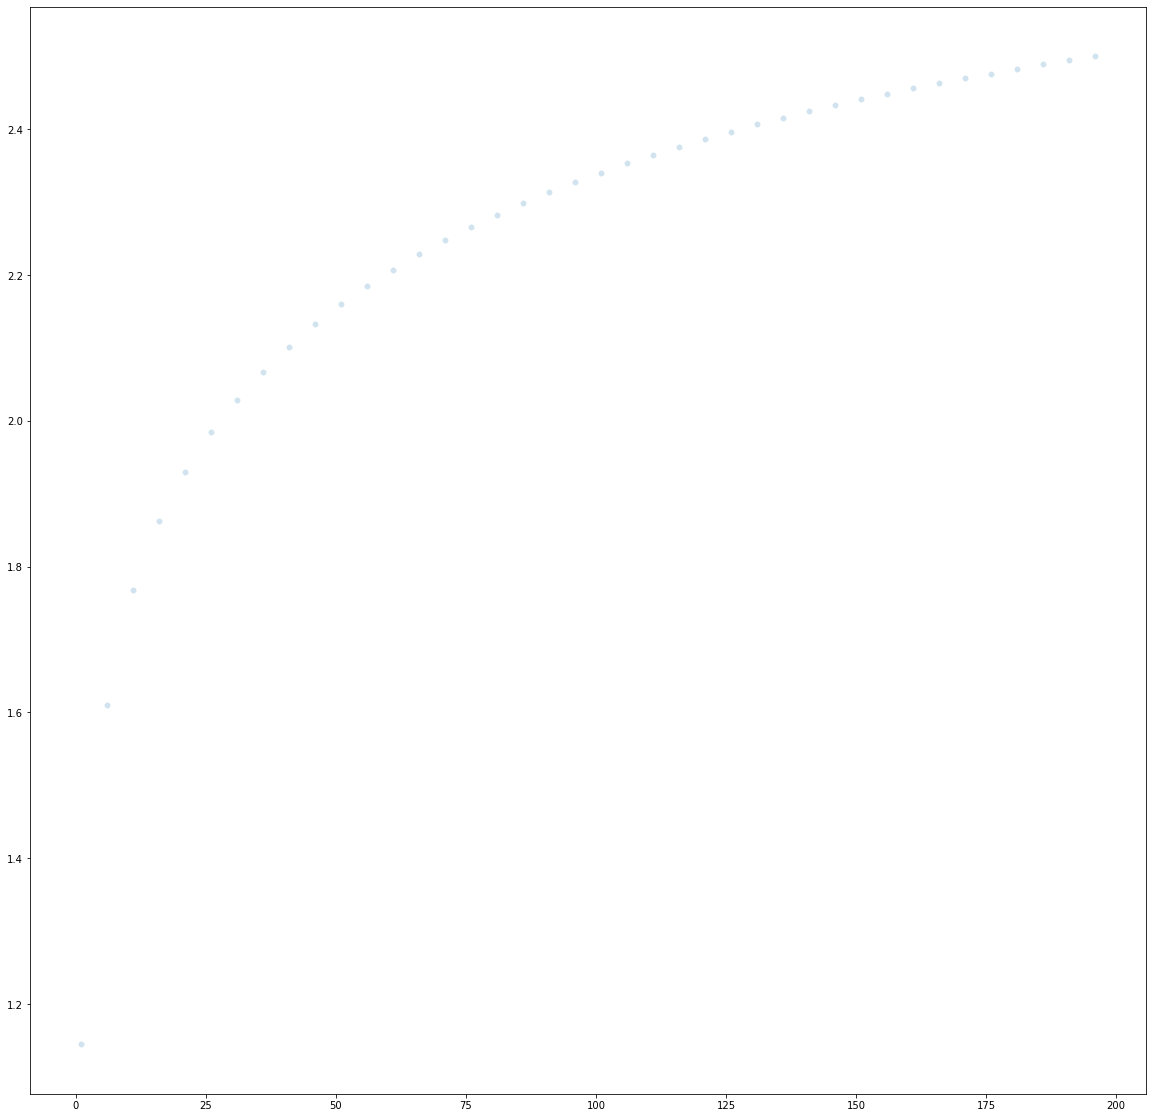

In [34]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=x_10, y=p_scores, alpha=0.2)
plt.show()

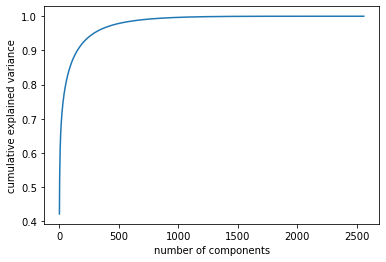

In [35]:
plots = PCA().fit(direct)
plt.plot(np.cumsum(plots.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

In [36]:
bin_size = 1
tot_frqs = int((samp_rt / 2) / bin_size)
tic_a = time.perf_counter()
ft_l1 = np.empty((time_import, tot_frqs))
frq_l1 = np.empty(tot_frqs, np.int8)
for c,v in enumerate(l1):
    frq_l1, amp = freq_analysis(v, 1, bin_size, samp_rt)
    ft_l1[c] = amp
toc_a = time.perf_counter()
print("time diff:", toc_a - tic_a)
    

time diff: 7.894050800000059


In [37]:
direct_l = pd.DataFrame(data = ft_l1, columns = frq_l1)

In [38]:
direct_l.head()

,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,0.006682,0.002864,0.002063,0.002576,0.001487,0.002265,0.001246,0.000746,0.000736,0.000537,...,0.000495,0.000315,0.000348,0.000591,0.000322,0.000325,0.001402,0.000727,0.001280,0.000640
1,0.002425,0.007835,0.002404,0.000887,0.000793,0.000488,0.000534,0.002048,0.002647,0.001445,...,0.000657,0.000648,0.000588,0.000177,0.001256,0.000369,0.000257,0.000416,0.000364,0.000833
2,0.002731,0.003588,0.000033,0.000882,0.002076,0.001844,0.000216,0.000542,0.000989,0.000998,...,0.000518,0.000612,0.001110,0.000500,0.001193,0.000226,0.000744,0.000311,0.000330,0.000746
3,0.003042,0.007249,0.002595,0.001512,0.000399,0.000641,0.001379,0.000632,0.000649,0.001042,...,0.000213,0.000310,0.000470,0.000281,0.001108,0.000677,0.000259,0.000366,0.000533,0.000601
4,0.000650,0.004082,0.000761,0.000169,0.001066,0.001146,0.000524,0.000194,0.001489,0.000912,...,0.000431,0.000960,0.000328,0.000074,0.000431,0.000369,0.000325,0.000886,0.000478,0.001188


In [39]:
p_scores_l = []
x_l = np.arange(1, 600, 10)
for i in x_l:
    pca_n = PCA(n_components = i)
    pca_n.fit(direct_l)
    p_scores_l.append(sum(pca_n.explained_variance_))

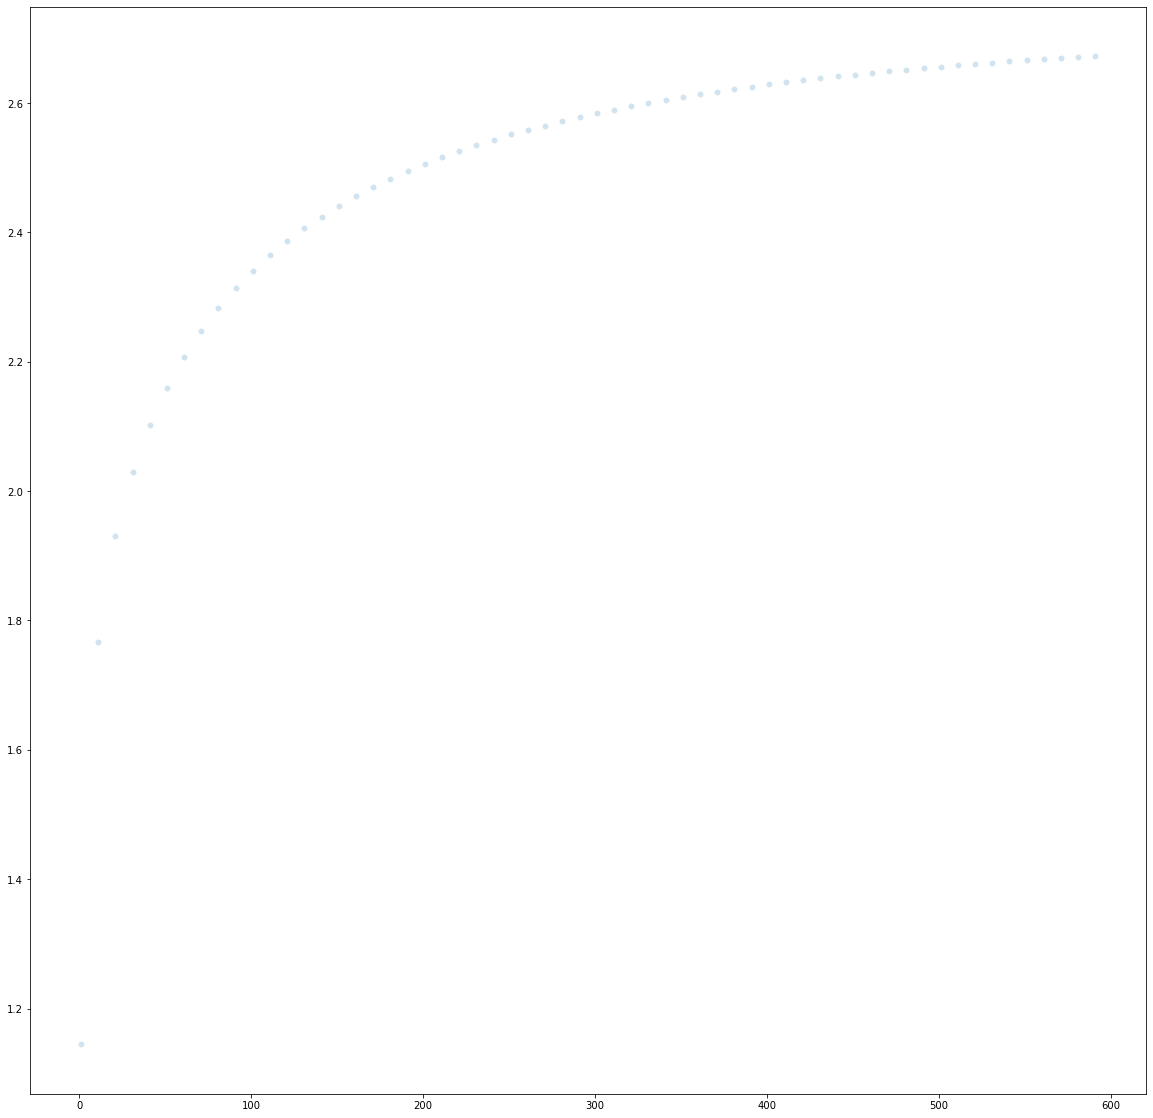

In [40]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=x_l, y=p_scores_l, alpha=0.2)
plt.show()

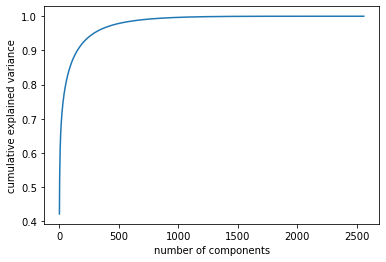

In [41]:
pca_l = PCA().fit(direct_l)
plt.plot(np.cumsum(pca_l.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

In [42]:
pca_direct = PCA(n_components=30).fit(direct)

In [43]:
type(pca_direct)

sklearn.decomposition._pca.PCA

In [44]:
p_direct = pca_direct.transform(direct)


In [45]:
p_df = pd.DataFrame(p_direct)
p_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.666098,-0.021279,0.011139,0.045842,0.014827,-0.010844,0.020786,0.017971,0.005617,0.023699,...,-0.007044,-0.003832,-0.015991,0.001474,-0.000647,0.010746,-0.004111,-0.008020,-0.003458,-0.003394
1,-0.705455,-0.017768,0.017176,0.063696,-0.005368,0.000477,0.010769,0.016723,0.009876,0.006367,...,-0.014605,-0.019953,-0.010354,0.011698,-0.000765,0.002527,-0.004589,-0.002321,-0.006566,0.000217
2,-0.672514,-0.026660,0.000847,0.034374,0.016698,0.004879,0.023474,0.014994,-0.002574,0.012419,...,-0.005105,-0.015647,-0.013499,0.007331,-0.003631,0.001763,-0.005777,0.006157,-0.000186,-0.002068
3,-0.685980,-0.025751,0.015148,0.051983,0.029537,0.004440,0.013544,-0.001044,0.004207,0.025440,...,-0.009228,-0.003430,-0.018499,0.011681,-0.000242,-0.001767,-0.014114,-0.007174,-0.009885,-0.004359
4,-0.705995,-0.017240,0.018929,0.045646,0.014549,-0.011417,0.025386,0.016056,0.002481,0.018245,...,-0.003865,-0.018548,-0.009985,0.000044,0.000402,0.005510,0.000689,0.001916,-0.013574,0.005457


In [46]:
p_df.shape

(3000, 30)

In [47]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components =2).fit(p_df.iloc[:,1:])

In [48]:
gm_lab = GaussianMixture(n_components =2).fit_predict(p_df.iloc[:,1:])

In [49]:
p_df["lab"] = gm_lab

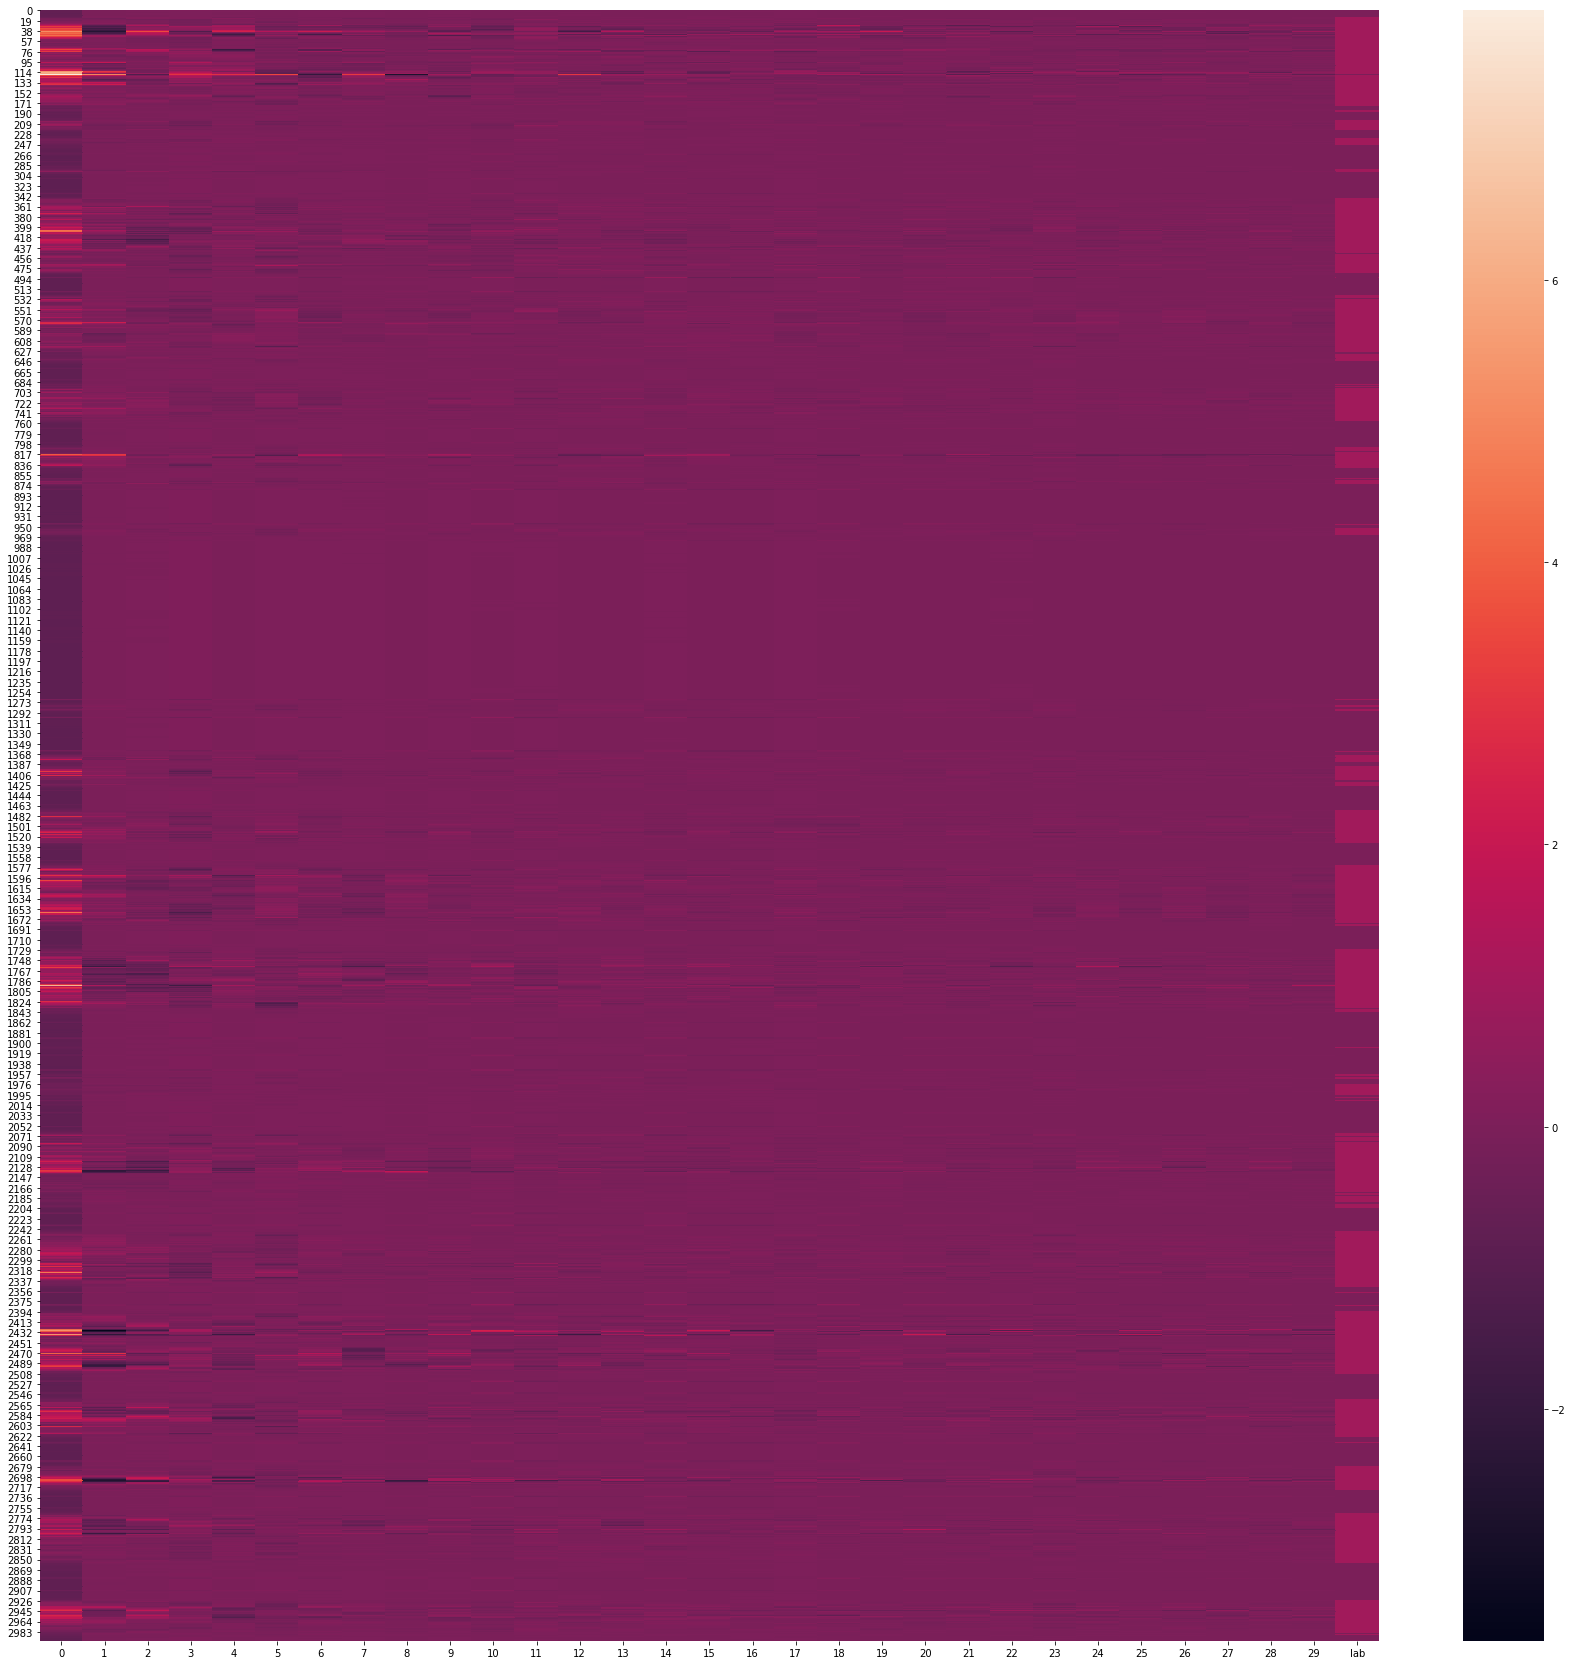

In [50]:
plt.figure(figsize=(30,30))
sb.heatmap(p_df)
plt.show()

In [51]:
gm_nat = GaussianMixture(n_components =2).fit(direct)
gm_lab_nat = GaussianMixture(n_components =2).fit_predict(direct)

In [52]:
direct["lab"] = gm_lab_nat

<ipython-input-53-0386aed397aa>:2: RuntimeWarning: divide by zero encountered in log
  sb.heatmap(np.log(direct))


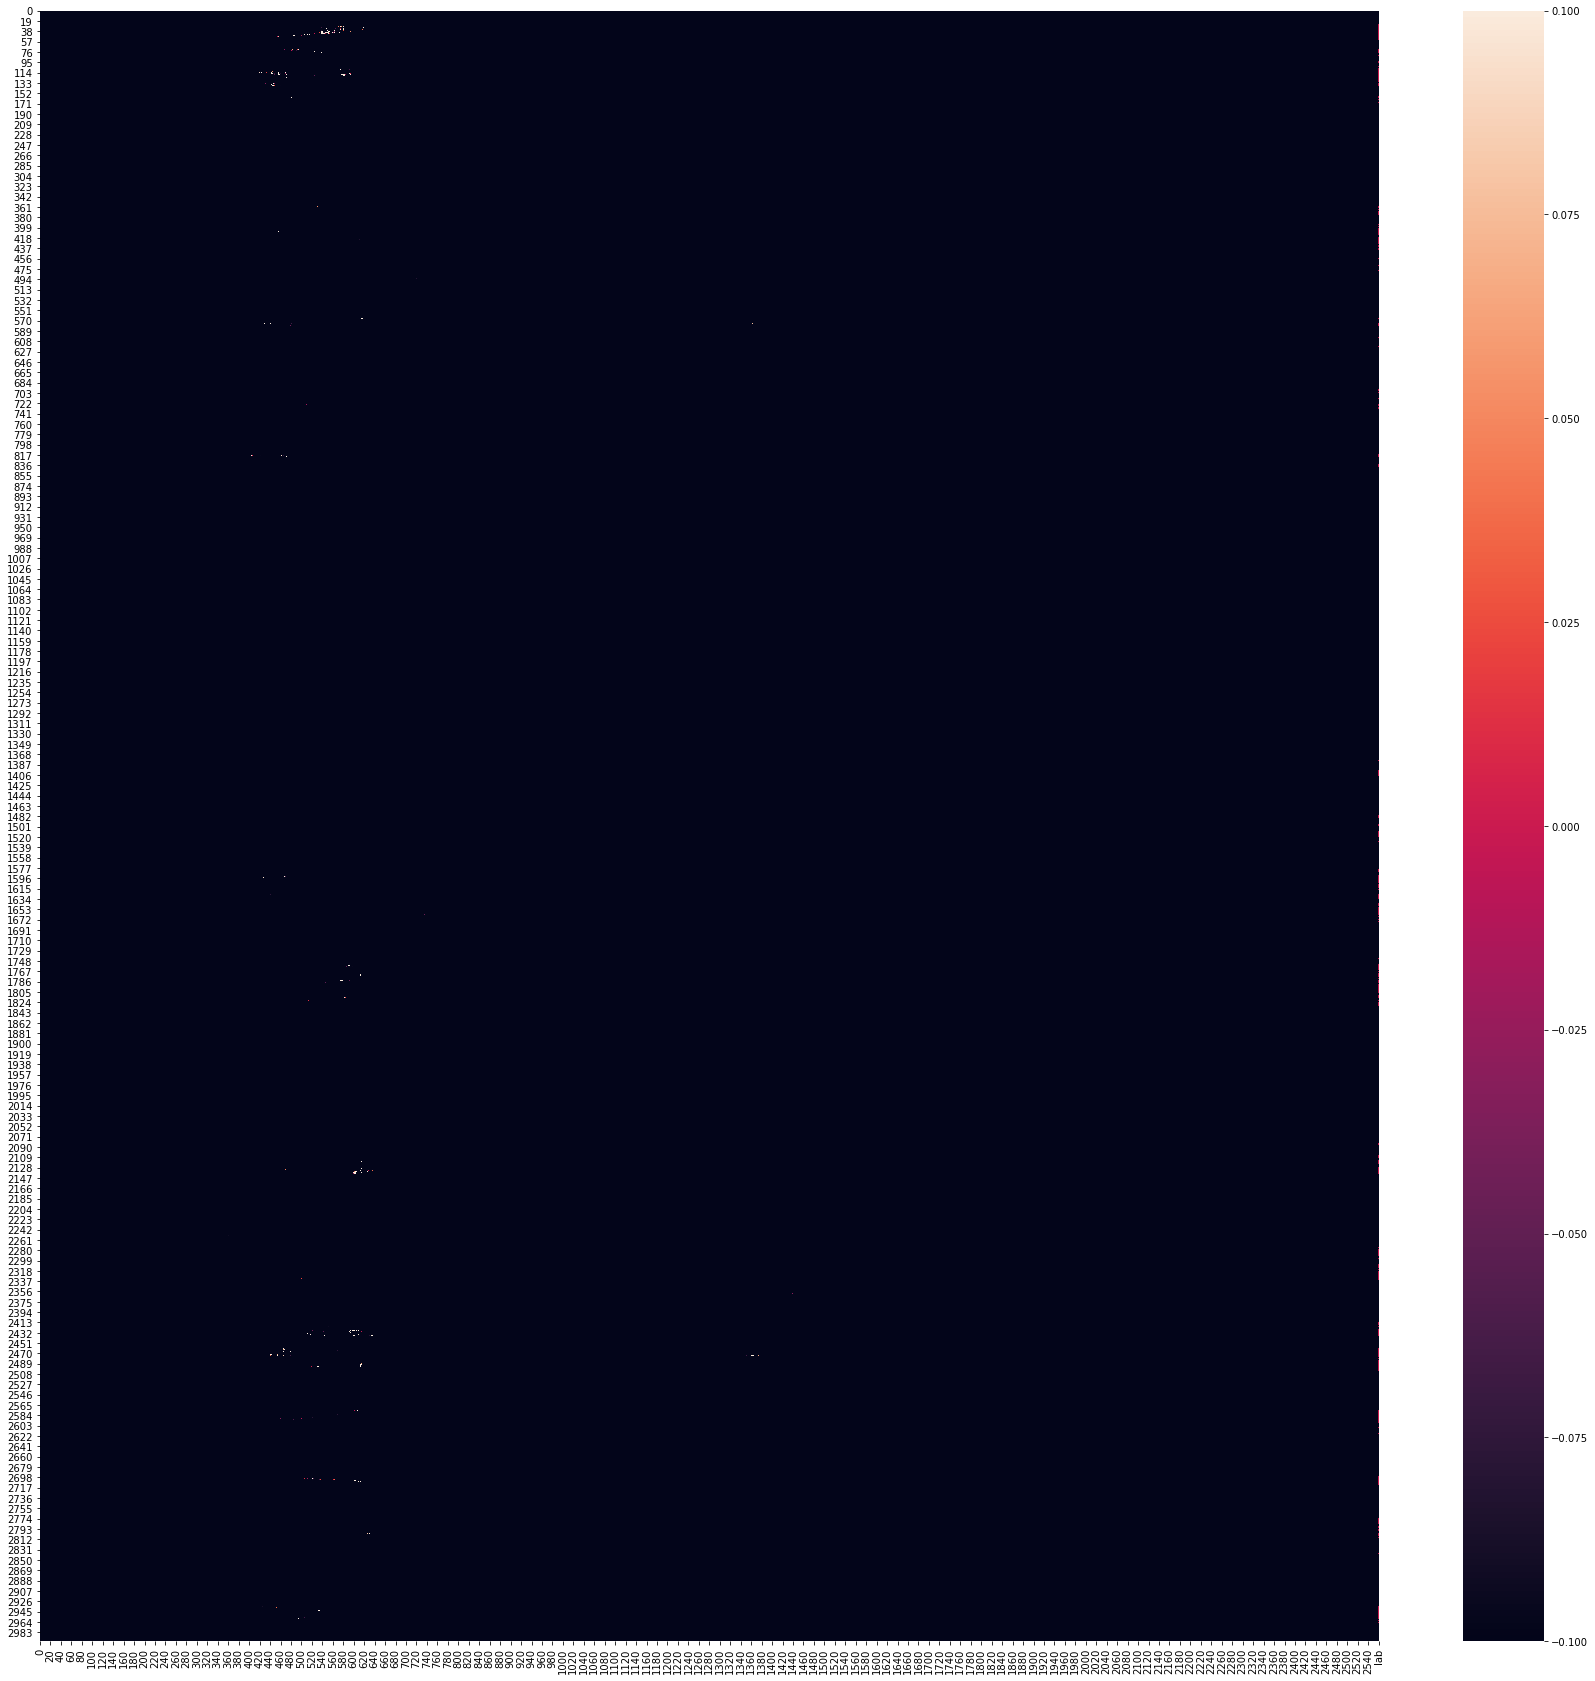

In [53]:
plt.figure(figsize=(30,30))
sb.heatmap(np.log(direct))
plt.show()

In [54]:
len(ft_l1)

3000

In [55]:
len(ft_l1[0])

2560

In [56]:
len(frq_l1)

2560

In [57]:
type(ft_l1)
type(frq_l1)

numpy.ndarray

In [58]:
type(ft_l1)

numpy.ndarray

In [59]:
ft_l1[0]

array([0.00668168, 0.00286359, 0.00206264, ..., 0.00072669, 0.00128046,
       0.00063972])

In [60]:
d_tst1 = {}
d_tst2 = {}
frq = ["a", "b", "c"]
amp = [[1, 2, 3], [1, 2, 3], [1, 2, 3], [2, 4, 6], [2, 4, 6], [2, 4, 6]]

In [61]:
tic = time.perf_counter()
for c,v in enumerate(frq):
    value = []
    for i in amp:
        value.append(i[c])
    key = str(v) + "_a"
    d_tst1[key] = value
toc = time.perf_counter()
print(toc-tic)
print(d_tst1.keys())
for i in d_tst1.keys():
    print(d_tst1[i])

0.0001376999998683459
dict_keys(['a_a', 'b_a', 'c_a'])
[1, 1, 1, 2, 2, 2]
[2, 2, 2, 4, 4, 4]
[3, 3, 3, 6, 6, 6]


In [62]:
tic = time.perf_counter()
n_amp = np.array(amp)
t_amp = np.transpose(n_amp)
d_tst2 = dict(zip(frq,t_amp))
toc = time.perf_counter()
print(toc-tic)
print(d_tst2.keys())
for i in d_tst2.keys():
    print(d_tst2[i])
    print(type(d_tst2[i]))

0.00017479999996794504
dict_keys(['a', 'b', 'c'])
[1 1 1 2 2 2]
<class 'numpy.ndarray'>
[2 2 2 4 4 4]
<class 'numpy.ndarray'>
[3 3 3 6 6 6]
<class 'numpy.ndarray'>


In [63]:
cols = []
for i in frq_l1:
    cols.append(str(i) + "_a")
#     cols.append(str(i) + "_b")

In [64]:
frq_l1.shape

(2560,)

In [65]:
ft_l1.shape

(3000, 2560)

In [66]:
amps = np.array(ft_l1)


In [67]:
df_m = pd.DataFrame(amps)
df_m.columns = cols[0:len(df_m.columns)]

In [68]:
df_m.head()

,0_a,1_a,2_a,3_a,4_a,5_a,6_a,7_a,8_a,9_a,...,2550_a,2551_a,2552_a,2553_a,2554_a,2555_a,2556_a,2557_a,2558_a,2559_a
0,0.006682,0.002864,0.002063,0.002576,0.001487,0.002265,0.001246,0.000746,0.000736,0.000537,...,0.000495,0.000315,0.000348,0.000591,0.000322,0.000325,0.001402,0.000727,0.001280,0.000640
1,0.002425,0.007835,0.002404,0.000887,0.000793,0.000488,0.000534,0.002048,0.002647,0.001445,...,0.000657,0.000648,0.000588,0.000177,0.001256,0.000369,0.000257,0.000416,0.000364,0.000833
2,0.002731,0.003588,0.000033,0.000882,0.002076,0.001844,0.000216,0.000542,0.000989,0.000998,...,0.000518,0.000612,0.001110,0.000500,0.001193,0.000226,0.000744,0.000311,0.000330,0.000746
3,0.003042,0.007249,0.002595,0.001512,0.000399,0.000641,0.001379,0.000632,0.000649,0.001042,...,0.000213,0.000310,0.000470,0.000281,0.001108,0.000677,0.000259,0.000366,0.000533,0.000601
4,0.000650,0.004082,0.000761,0.000169,0.001066,0.001146,0.000524,0.000194,0.001489,0.000912,...,0.000431,0.000960,0.000328,0.000074,0.000431,0.000369,0.000325,0.000886,0.000478,0.001188


In [69]:
dic_ = {}
for c,v in enumerate(frq_l1):
    value = []
    for i in ft_l1:
        value.append(list(i)[c])
    key = str(v) + "_a"
    dic_[key] = value
        
    
    
    

In [70]:
for c,v in enumerate(frq_l2):
    value = []
    for i in ft_l1:
        value.append(list(i)[c])
    key =  str(v) + "_b"
    dic_[key] = value

In [71]:
dic_.keys()

dict_keys(['0_a', '1_a', '2_a', '3_a', '4_a', '5_a', '6_a', '7_a', '8_a', '9_a', '10_a', '11_a', '12_a', '13_a', '14_a', '15_a', '16_a', '17_a', '18_a', '19_a', '20_a', '21_a', '22_a', '23_a', '24_a', '25_a', '26_a', '27_a', '28_a', '29_a', '30_a', '31_a', '32_a', '33_a', '34_a', '35_a', '36_a', '37_a', '38_a', '39_a', '40_a', '41_a', '42_a', '43_a', '44_a', '45_a', '46_a', '47_a', '48_a', '49_a', '50_a', '51_a', '52_a', '53_a', '54_a', '55_a', '56_a', '57_a', '58_a', '59_a', '60_a', '61_a', '62_a', '63_a', '64_a', '65_a', '66_a', '67_a', '68_a', '69_a', '70_a', '71_a', '72_a', '73_a', '74_a', '75_a', '76_a', '77_a', '78_a', '79_a', '80_a', '81_a', '82_a', '83_a', '84_a', '85_a', '86_a', '87_a', '88_a', '89_a', '90_a', '91_a', '92_a', '93_a', '94_a', '95_a', '96_a', '97_a', '98_a', '99_a', '100_a', '101_a', '102_a', '103_a', '104_a', '105_a', '106_a', '107_a', '108_a', '109_a', '110_a', '111_a', '112_a', '113_a', '114_a', '115_a', '116_a', '117_a', '118_a', '119_a', '120_a', '121_a', '

In [72]:
df = pd.DataFrame(data = dic_)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 2816 entries, 0_a to 2550_b
dtypes: float64(2816)
memory usage: 64.5 MB


In [74]:
df.describe()

,0_a,1_a,2_a,3_a,4_a,5_a,6_a,7_a,8_a,9_a,...,2460_b,2470_b,2480_b,2490_b,2500_b,2510_b,2520_b,2530_b,2540_b,2550_b
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1.956715e-02,0.019222,0.014702,0.010671,0.007688,0.007943,0.006442,0.006016,0.005284,0.004450,...,0.012705,0.012838,0.012716,0.014012,0.014115,0.013877,0.014099,0.014210,0.013435,0.013076
std,5.381556e-02,0.044227,0.031240,0.020952,0.012999,0.011491,0.010415,0.009131,0.007699,0.005973,...,0.018206,0.018268,0.017755,0.020606,0.021501,0.019868,0.021386,0.021304,0.019350,0.019054
min,1.607447e-07,0.000105,0.000033,0.000010,0.000027,0.000011,0.000051,0.000045,0.000050,0.000053,...,0.000025,0.000010,0.000011,0.000135,0.000019,0.000010,0.000026,0.000006,0.000019,0.000012
25%,1.737081e-03,0.002635,0.002094,0.001700,0.001561,0.002291,0.001360,0.001295,0.001158,0.001153,...,0.000587,0.000597,0.000693,0.001530,0.000636,0.000582,0.000594,0.000536,0.000591,0.000593
50%,3.822039e-03,0.004401,0.003609,0.003165,0.002897,0.005554,0.002701,0.002452,0.002325,0.002314,...,0.006536,0.006654,0.006659,0.006655,0.006447,0.006977,0.006794,0.006923,0.006597,0.006396
75%,8.572391e-03,0.007721,0.006750,0.006995,0.006825,0.008429,0.006360,0.005947,0.005561,0.005143,...,0.016968,0.016784,0.017216,0.017888,0.017865,0.018629,0.017469,0.018702,0.017527,0.017465
max,1.132105e+00,0.665468,0.400348,0.257037,0.165752,0.224333,0.142488,0.117170,0.094180,0.076130,...,0.226337,0.171292,0.209678,0.271580,0.265799,0.176667,0.251989,0.231476,0.172359,0.266447


In [75]:
name = "ft_first_" + str(time_import) + ".csv"
df.to_csv(name)

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
print(pca.explained_variance_)


[1.15748118 0.184757  ]


In [77]:
p_scores = []
for i in np.arange(1,100):
    pca_n = PCA(n_components = i)
    pca_n.fit(df)
    p_scores.append(sum(pca_n.explained_variance_))

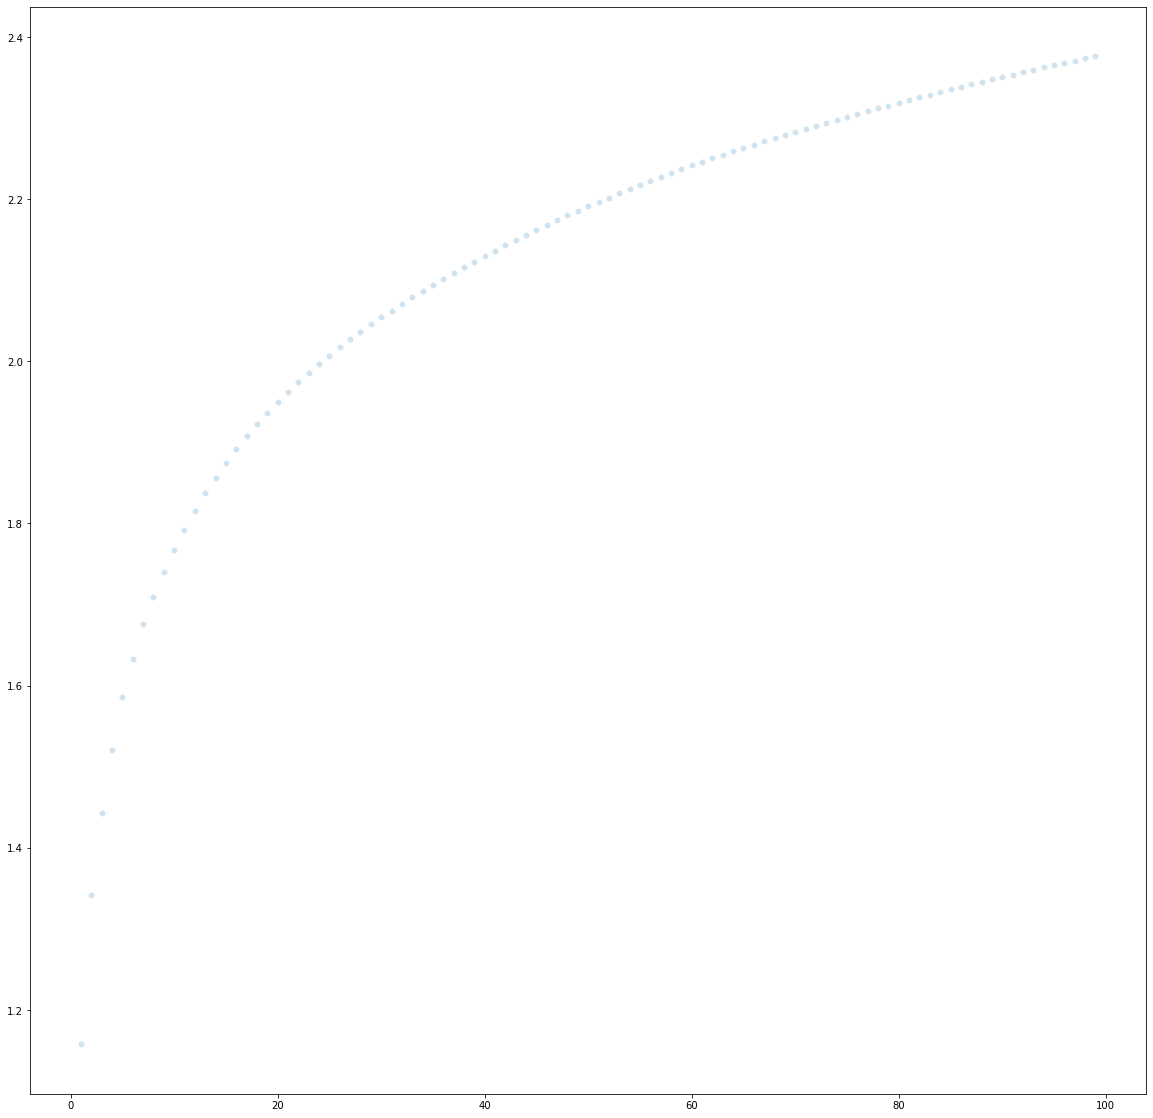

In [78]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=np.arange(1,100), y=p_scores, alpha=0.2)
plt.show()

In [79]:
tic_a = time.perf_counter()
ft_l1 = []
frq_l1 = []
for i in l1:
    frq_l1, amp = freq_analysis(i, 1, 1, samp_rt)
    ft_l1.append(amp)
toc_a = time.perf_counter()
print("time diff:", toc_a - tic_a)
   

time diff: 11.541661400000521


In [80]:
tic_b = time.perf_counter()
ft_l2 = []
frq_l2 = []
count = 0
for i in l2:
#     mtic = time.perf_counter()
    frq_l2, amp = freq_analysis(i, 1, 1, samp_rt)
    ft_l2.append(amp)   
#     mtoc = time.perf_counter()
#     print(count, mtoc- mtic)
    count += 1
toc_b = time.perf_counter()
print("time diff:", toc_b - tic_b)

time diff: 11.147948099999667


In [81]:
len(ft_l1)

3000

In [82]:
len(ft_l1[0])

2560

In [83]:
len(frq_l1)

2560

In [84]:
type(ft_l1)

list

In [85]:
dic_1 = {}
for c,v in enumerate(frq_l1):
    value = []
    for i in ft_l1:
        value.append(list(i)[c])
    key = str(v) + "_a"
    dic_1[key] = value
        
    
    
    

In [86]:

for c,v in enumerate(frq_l2):
    value = []
    for i in ft_l1:
        value.append(list(i)[c])
    key =  str(v) + "_b"
    dic_1[key] = value

In [87]:
df_1 = pd.DataFrame(data = dic_1)

In [88]:
p_scores_1 = []
for i in np.arange(1,100):
    pca_n = PCA(n_components = i)
    pca_n.fit(df_1)
    p_scores.append(sum(pca_n.explained_variance_))

In [89]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=np.arange(1,100), y=p_scores_1, alpha=0.2)
plt.show()

ValueError: arrays must all be same length

<Figure size 1440x1440 with 0 Axes>

In [ ]:
p_scores_1 = []
for i in np.arange(1,1000):
    pca_n = PCA(n_components = i)
    pca_n.fit(df_1)
    p_scores.append(sum(pca_n.explained_variance_))

In [ ]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=np.arange(1,1000), y=p_scores_1, alpha=0.2)
plt.show()

In [ ]:
80/3.6

examine auto correllation for velocity 